# Data Visualization Workshop: 2019BCのデータver.

# 深田コメント
1. コードや見た目
    1. **1.1**現状分析という風にコードを書く前に今どのフェーズにいるのかを番号をつけて明示した方が良い
    2. 出来るだけ簡潔に、自分で文字を置く場合、一般的にも何を表すものなのか書かないとわかりづらい。
    3. なるべく新しいデータフレームは作りたくない、可視化したい図をイメージして、一つのdfから全て引っ張ってこれるようなdfを設定するべき
2. ストーリーライン→これは僕も考えます
    1. 全体としてストーリーをもう一回考えた方がいいかなと。ともやはデータを作成してて、その後の展開等を知っているから先入観で話を進めてしまっているけど、これを初めて読んだ人が近しいロジックを踏むか考える必要がある
        1. クロス集計のところ。男性が多いから男性が直接的な売上減少の原因であるとは考えられない。男女の客単価の差を考える必要がある。とか、、

# 0. イントロ
## 0.0 データ分析の目的
1. 生の数字からでは把握できないことを可視化することによってインサイトを得て次のアクションに結びつけること。
    1. 全体像(分析によって欲しいアウトプットとそれを構成する要素の数)と自分の分析している要素を確認しつつ、マクロからミクロに展開していくこと


## 0.1 このWSの目的
1. プロジェクトで活きるデータの可視化のための基本スキルを身につけてもらう
    1. データ分析の流れ（抽出→集計→加工→可視化）を理解すること
    2. 可視化の目的は意思決定に役立てること
2. Pythonや可視化ツールのおもしろさを伝えて、今後取り組むきっかけを生み出す

# 1. 前準備

### 【背景】ヒアリングによると、売上が減少しているらしい。
### 【目的】売上減少の原因を探り、来月の売上減少を阻止するためのインサイトを得ること
### 【そのために】実際にデータを見て、どれくらい売上が減少しているのだろうか？グラフを作って確認したいが、、、
### 【その前に】分析の前準備として、まずは今持っているデータに対する理解を深めておこう。そしてアウトプットを出す上で分析するのに必要十分なデータなのか確認しよう！

## 1.1 データ理解

In [1]:
import pandas as pd
df = pd.read_csv('./20191130_Sample_data.csv', encoding = 'utf-8')

In [2]:
#./←カレントディレクトリの意味。ディレクトリの話とかはなしでおけ？
#あとデータの売上の部分にマイナスがあった

### データの構成要素と全体像を把握する

In [3]:
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category
0,2018/9/23,1,1,65,Male,28649,Chiba,Kanto,Furniture
1,2018/1/8,2,1,45,Male,11466,Wakayama,Kansai,Commodity
2,2018/2/8,2,2,45,Male,10428,Hyogo,Kansai,Commodity
3,2018/3/7,2,3,45,Male,9510,Saitama,Kanto,Commodity
4,2018/3/10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 9 columns):
Date          773 non-null object
ID            773 non-null int64
Frequency     773 non-null int64
Age           773 non-null int64
Sex           773 non-null object
Sale          773 non-null int64
Prefecture    773 non-null object
Area          773 non-null object
Category      773 non-null object
dtypes: int64(4), object(5)
memory usage: 54.4+ KB


## 1.2 データ加工

### Dateの部分が使いにくい。今回の目的は売上減少の原因を突き止めて来月の売上減少を回避したい→日付の部分から月のみを取り出そう！
欲しいアウトプットに対して、どこまでドリルダウンするのかを意識して、何のデータが欲しいのか？どこまで掘り下げるのか？を常に考えることの重要性をひつこく伝える。


今回は違うが、年代+性別というひとまとまりのデータが得られたりする場合があり、どこまでセグメントを分けるのか考える必要があることを伝える。

In [5]:
# 月ごとに集計をするため、日付から月を取り出す。（他にも良い方法あるのかな？）→とりあえずこれでいいと思う
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Month'] = df['Date'].dt.month
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month
0,2018-09-23,1,1,65,Male,28649,Chiba,Kanto,Furniture,9
1,2018-01-08,2,1,45,Male,11466,Wakayama,Kansai,Commodity,1
2,2018-02-08,2,2,45,Male,10428,Hyogo,Kansai,Commodity,2
3,2018-03-07,2,3,45,Male,9510,Saitama,Kanto,Commodity,3
4,2018-03-10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies,3


In [6]:
#型がdatetimeに変わったことを確認
df.Date.dtypes

dtype('<M8[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 10 columns):
Date          773 non-null datetime64[ns]
ID            773 non-null int64
Frequency     773 non-null int64
Age           773 non-null int64
Sex           773 non-null object
Sale          773 non-null int64
Prefecture    773 non-null object
Area          773 non-null object
Category      773 non-null object
Month         773 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 60.5+ KB


## 2. データ可視化による現状分析

## 2.1 売上が減少しているのか確認する！

In [8]:
'''
groupby説明しっかりした方がいいな
groupby は、同じ値を持つデータをまとめて、それぞれの塊に対して共通の操作を行いたい時に使う。

ex)
月ごとの売上や購入頻度の平均、分散、合計値等の情報が欲しい！
性別と年代それぞれの軸で、売上の合計値がほしい！
'''

'\ngroupby説明しっかりした方がいいな\ngroupby は、同じ値を持つデータをまとめて、それぞれの塊に対して共通の操作を行いたい時に使う。\n\nex)\n月ごとの売上や購入頻度の平均、分散、合計値等の情報が欲しい！\n性別と年代それぞれの軸で、売上の合計値がほしい！\n'

In [9]:
df_Sale = df.groupby('Month').sum()
df_Sale.head()
#月という軸で切ってるからdf_monthという名前の方がいい気する

,ID,Frequency,Age,Sale
Month,,,,
1,13781,72,2742,752223
2,15333,89,2783,813704
3,14056,123,3243,875914
4,17006,144,3544,939119
5,16039,182,3393,786863


In [10]:
#df.groupby('Month').sum()はデータフレームの型になっていることに注意

In [11]:
df_Sale['Sale'].head()

Month
1    752223
2    813704
3    875914
4    939119
5    786863
Name: Sale, dtype: int64

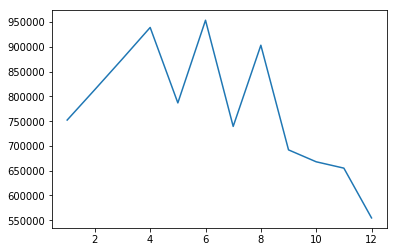

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_Sale.index, df_Sale['Sale'])

(0, 1000000)

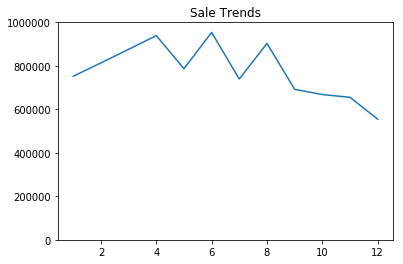

In [13]:
plt.plot(df_Sale.index, df_Sale['Sale'])
plt.title('Sale Trends')
plt.ylim(0, 1000000)

In [14]:
#こっちの方がいいかも
df.groupby('Month').Sale.sum().reset_index()
df_month_sales = df.groupby('Month').Sale.sum().reset_index()

In [15]:
df_month_sales.head()

,Month,Sale
0,1,752223
1,2,813704
2,3,875914
3,4,939119
4,5,786863


(0, 1000000)

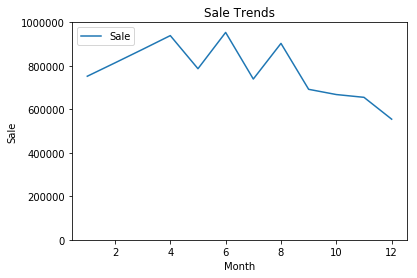

In [16]:
plt.plot(df_month_sales.Month, df_month_sales.Sale,label='Sale')
plt.title('Sale Trends')
plt.xlabel('Month')
plt.ylabel('Sale')
plt.legend(loc='upper left')
plt.ylim(0, 1000000)

(0, 1000000)

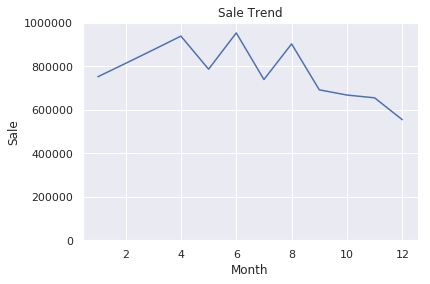

In [17]:
import seaborn as sns
sns.set()

sns.lineplot(df_Sale.index, df_Sale['Sale'])
plt.title('Sale Trend')
plt.ylim(0, 1000000)

(0, 1000000)

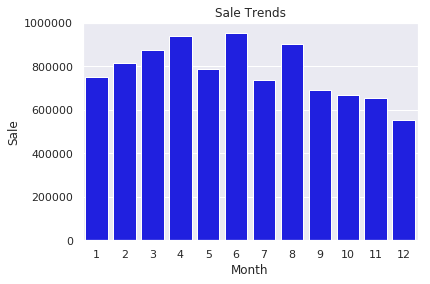

In [18]:
sns.barplot(df_Sale.index, df_Sale['Sale'], color = 'blue')
plt.title('Sale Trends')
plt.ylim(0, 1000000)

### わかったこと :  減少傾向にある。4月ころから、増減を繰り返しており、8月からは減少傾向は強まっている。

### どうして減少したのだろうか？
### 売上＝客数(購買回数)×客単価より、どちらの影響かを考えていく。

※今回は1人1種類の商品しか買っていないことになっている。1レコード1ユーザー。

## 2.2 客単価から見ていく。客単価は売上の平均値となる。

In [19]:
df_purchase = df.groupby('Month').mean()
df_purchase['Sale'].head(12)

Month
1     11753.484375
2     12144.835821
3     12165.472222
4     12356.828947
5     10491.506667
6     13064.082192
7     11375.523077
8     15846.684211
9     11162.241935
10    11322.220339
11    12362.301887
12    11094.760000
Name: Sale, dtype: float64

In [20]:
#名前
df_month_mean = df.groupby('Month').mean()
df_month_mean.head()

,ID,Frequency,Age,Sale
Month,,,,
1,215.328125,1.125000,42.843750,11753.484375
2,228.850746,1.328358,41.537313,12144.835821
3,195.222222,1.708333,45.041667,12165.472222
4,223.763158,1.894737,46.631579,12356.828947
5,213.853333,2.426667,45.240000,10491.506667


### プロットしてみよう。

(0, 17000)

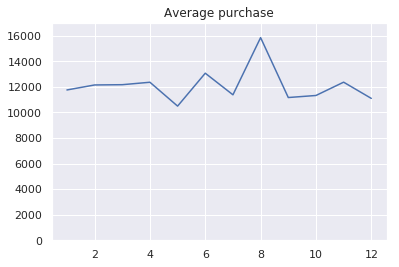

In [21]:
plt.plot(df_purchase.index, df_purchase['Sale'])
plt.title('Average purchase')
plt.ylim(0, 17000)

### 8月に急激に伸びている。それ以外の時期では、12000円付近になっている。

In [22]:
df_month_mean.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

In [23]:
#名前,なんの変数なのかを常に意識
df_month_mean = df.groupby('Month').mean()
df_month_mean.head()

,ID,Frequency,Age,Sale
Month,,,,
1,215.328125,1.125000,42.843750,11753.484375
2,228.850746,1.328358,41.537313,12144.835821
3,195.222222,1.708333,45.041667,12165.472222
4,223.763158,1.894737,46.631579,12356.828947
5,213.853333,2.426667,45.240000,10491.506667


Text(0.5, 1.0, 'Average purchase')

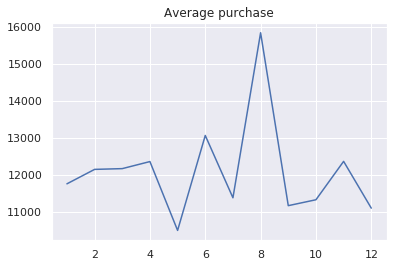

In [24]:
plt.plot(df_month_mean.index, df_month_mean['Sale'])
plt.title('Average purchase')

## 2.3 客数＝購買回数はどうだろうか？

In [25]:
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month
0,2018-09-23,1,1,65,Male,28649,Chiba,Kanto,Furniture,9
1,2018-01-08,2,1,45,Male,11466,Wakayama,Kansai,Commodity,1
2,2018-02-08,2,2,45,Male,10428,Hyogo,Kansai,Commodity,2
3,2018-03-07,2,3,45,Male,9510,Saitama,Kanto,Commodity,3
4,2018-03-10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies,3


In [26]:

df_trans = df.groupby('Month').count()
df_trans['ID'].head(12)

Month
1     64
2     67
3     72
4     76
5     75
6     73
7     65
8     57
9     62
10    59
11    53
12    50
Name: ID, dtype: int64

(0, 80)

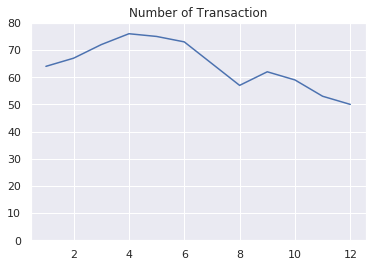

In [27]:
plt.plot(df_trans.index, df_trans['ID'])
plt.title('Number of Transaction')
plt.ylim(0, 80)

### 売上の減少と購入者の減少の様子が似ている⇒客単価よりも、購入者数の減少が売上減少の原因として大きいのではないか？（方向性を立てる。）

## 3 ボトルネック特定

### 購入者減少の要因を掴みたい。仮説を立てるために、購入者はどんな人なのか？データから観測される範囲で購入者の特徴を捉えてみよう！

## 3.1 デモグラフィックな観点から考える。

## 3.1.1 年齢層を見てみる。

In [28]:
# 年代ごとにカウントしていきたい。なので、年齢を年代に直す作業を行う。ex. 45→40
df['Ages'] = df['Age']//10*10

In [29]:
#df_ages = df.groupby('Ages').nunique()でも動きました！
uniqueID_age = df.groupby('Ages').ID.agg(lambda x: x.nunique())

Text(0.5, 1.0, 'Age')

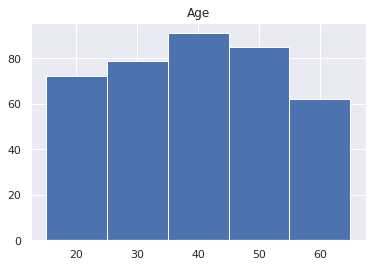

In [30]:
plt.bar(uniqueID_age.index, uniqueID_age, width = 10)
plt.title('Age')

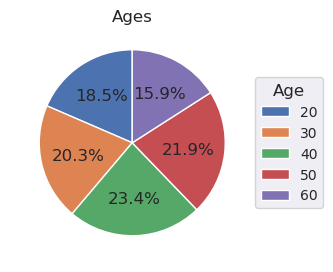

In [31]:
fig = plt.figure(figsize=(3,3),dpi=100,facecolor='w',edgecolor='k')
plt.subplot(1,1,1)
label = uniqueID_age.index
x = uniqueID_age
# 綺麗な円にならなかったら
plt.axis('equal')
plt.title('Ages')
wedges, texts, autotexts = plt.pie(x,startangle=90, autopct="%.1f%%")

plt.legend(wedges[:10], label[:10],
          title="Age",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

### 性別を見てみる。

In [32]:
df_unique_id_sex = df.groupby('Sex').nunique()

<BarContainer object of 2 artists>

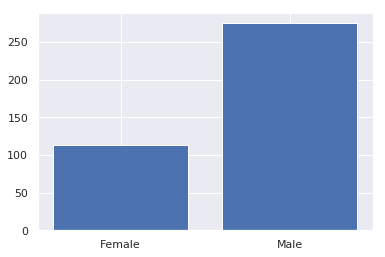

In [33]:
# 日本語対応させなきゃ。
plt.bar(df_unique_id_sex.index, df_unique_id_sex['ID'])

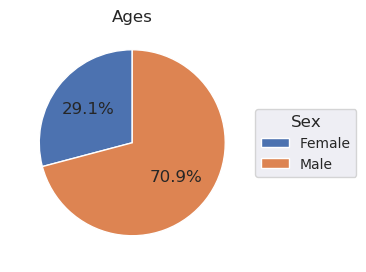

In [34]:
fig = plt.figure(figsize=(3,3),dpi=100,facecolor='w',edgecolor='k')
plt.subplot(1,1,1)
label = df_unique_id_sex.index
x = df_unique_id_sex.ID
# 綺麗な円にならなかったら
plt.axis('equal')
plt.title('Ages')
wedges, texts, autotexts = plt.pie(x,startangle=90, autopct="%.1f%%")

plt.legend(wedges[:10], label[:10],
          title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

## 性別×年代でクロス集計

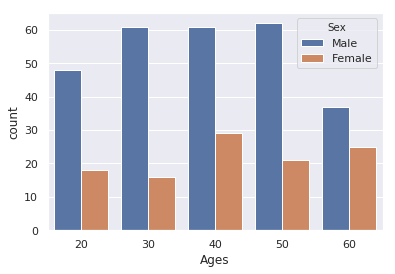

In [35]:
# IDのダブリをなくせばすぐに出来る。
df_sex_age = df.drop_duplicates(subset = ['ID'], keep = 'last')
sns.countplot(x = df_sex_age['Ages'], hue = df_sex_age['Sex'])

### わかったこと
1. 男性の割合が7割
2. 年代分布は平均を40代とした正規分布に近い
3. 男女によって年代の分布は異なる。40代では全体の男女割合において女性が少し高い

→客単価が男女間で差がないと仮定し、年代と性別の月ごとの変化を見たい。

## 仮説：男性の方が多いから、男性が減ったのでしょうか？
この仮説変じゃない？上のクロス表やこれまでのグラフからわかること？

## 3.1.2 この段階では売上減少の直接的な原因がわからないため、時間という変数を追加してみる

### 月ごとの男女での客数の変化

In [36]:
df.groupby(['Sex','Month']).ID.nunique()

Sex     Month
Female  1        16
        2        12
        3        15
        4        16
        5        15
        6        15
        7        13
        8        10
        9        19
        10       14
        11       15
        12       14
Male    1        41
        2        49
        3        52
        4        50
        5        51
        6        53
        7        43
        8        42
        9        38
        10       39
        11       36
        12       33
Name: ID, dtype: int64

In [37]:
df_uniqueID_sex_month = df.groupby(['Sex','Month']).ID.nunique()

In [38]:
df_uniqueID_sex_month.Female.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

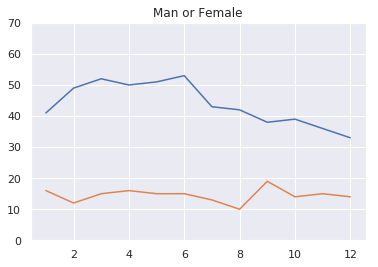

In [39]:
plt.title('Man or Female')
plt.ylim(0, 70)
plt.plot(df_uniqueID_sex_month.Male.index, df_uniqueID_sex_month.Male.values)
plt.plot(df_uniqueID_sex_month.Female.index, df_uniqueID_sex_month.Female.values)

### 男性の減少が顕著

## 月ごとの年代の客数変化

In [40]:
df.groupby(['Ages','Month']).ID.nunique()

Ages  Month
20    1         7
      2        13
      3        12
      4         9
      5         8
      6         9
      7        11
      8        10
      9         6
      10        8
      11        4
      12       10
30    1        19
      2        18
      3        14
      4        13
      5        17
      6        19
      7        14
      8        11
      9         7
      10       12
      11       12
      12        6
40    1        15
      2        11
      3        14
      4        13
      5        14
      6        13
      7        11
      8        12
      9        18
      10       13
      11       13
      12        8
50    1        10
      2        11
      3        15
      4        17
      5        16
      6        17
      7        11
      8        14
      9        13
      10       13
      11       13
      12        9
60    1         7
      2         6
      3        13
      4        12
      5        11
      6        11
      7        1

In [41]:
df_uniqueID_age_month = df.groupby(['Ages','Month']).ID.nunique()

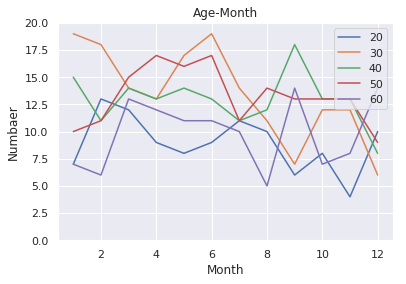

In [42]:
plt.title('Age-Month')
plt.ylim(0, 70)
ages = [20,30,40,50,60]#ここ微妙
for i in ages:
    plt.plot(df_uniqueID_age_month[i].index, df_uniqueID_age_month[i].values,label=i)
    plt.ylim(0, 20)
    plt.xlabel('Month')
    plt.ylabel('Numbaer')
    plt.legend(loc = 'upper right')

### あまりこのデータからはわからない気する

## 3.2 購買頻度で顧客を見てみる

In [43]:
df.head()

,Date,ID,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month,Ages
0,2018-09-23,1,1,65,Male,28649,Chiba,Kanto,Furniture,9,60
1,2018-01-08,2,1,45,Male,11466,Wakayama,Kansai,Commodity,1,40
2,2018-02-08,2,2,45,Male,10428,Hyogo,Kansai,Commodity,2,40
3,2018-03-07,2,3,45,Male,9510,Saitama,Kanto,Commodity,3,40
4,2018-03-10,2,4,45,Male,2706,Osaka,Kansai,Office Supplies,3,40


In [44]:
# IDでグループかつ、最大値を考えることで、個人の購買頻度がデータに含まれる。→最初からfrequencyがデータとして残ってるってことか。。
df_Freq = df.groupby('ID').max()
df_Freq.head()

,Date,Frequency,Age,Sex,Sale,Prefecture,Area,Category,Month,Ages
ID,,,,,,,,,,
1,2018-09-23,1,65,Male,28649,Chiba,Kanto,Furniture,9,60
2,2018-09-23,8,45,Male,24254,Wakayama,Tyubu,Office Supplies,9,40
3,2018-11-29,1,49,Male,105,Kagoshima,Kyusyuu,Office Supplies,11,40
4,2018-03-04,1,49,Male,561,Nara,Kansai,Office Supplies,3,40
5,2018-07-20,6,69,Male,28246,Tochigi,Tyubu,Office Supplies,7,60


Text(0.5, 1.0, 'Frequency')

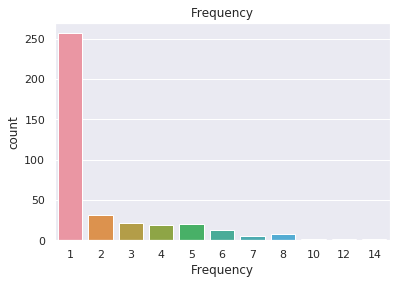

In [45]:
# 圧倒的に1回で終わっている人が多い。
sns.countplot(df_Freq['Frequency'])
plt.title('Frequency')

In [46]:
# 新規を示すダミー変数を作る。その月に初めて購買した人。
for i in range (len(df)):
    if df.loc[i, 'Frequency'] == 1:
        df.loc[i, 'New'] = 1
    else:
        df.loc[i, 'New'] = 0

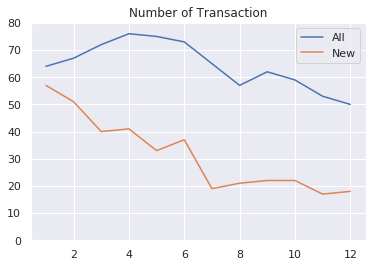

In [47]:
# １月に両者の値が一致しないのは、1月に2回以上購入した人がいるからである。
#割合表示の方がいい気する
df_new_visit = df.groupby('Month').sum()

plt.plot(df_trans.index, df_trans['ID'], label = 'All')
plt.plot(df_new_visit.index , df_new_visit['New'], label = 'New')
plt.title('Number of Transaction')
plt.ylim(0, 80)
plt.legend()

## 新規の流入は段々と減っているのは事実。どうして、新規の流入が減っているのだろうか？どうすれば、新規の流入を回復させることが出来るか？